In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

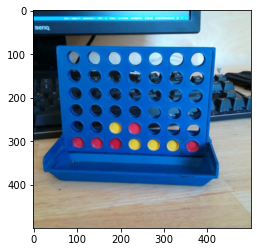

In [125]:
img = cv2.imread('image.jpg')
img = cv2.resize(img, (500, 500))

def showImage(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

showImage(img)

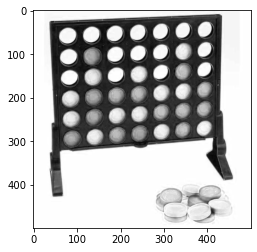

In [120]:
blueImg = img[:,:,2]
plt.imshow(blueImg, cmap = 'gray')
plt.show()

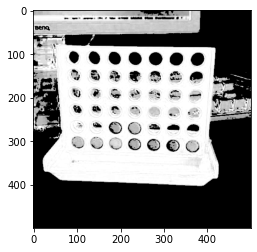

In [128]:
hsvImg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
testImg = abs(hsvImg[:,:,1] - 0.615)
testImg = np.where(testImg < 150, 0, testImg)
plt.imshow(testImg, cmap='gray')
plt.show()

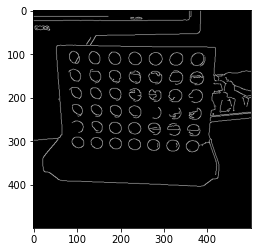

In [97]:
bilateral_filtered_image = cv2.bilateralFilter(img, 15, 190, 190)
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 150)
contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
showImage(edge_detected_image)



In [98]:
edge_detected_image.shape

(500, 500)

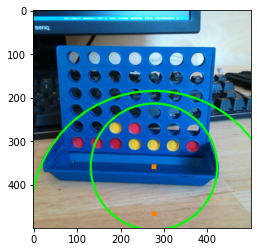

In [99]:
circles = cv2.HoughCircles(edge_detected_image, cv2.HOUGH_GRADIENT, 1.2, 100)
output = img.copy()

if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
	showImage(output)

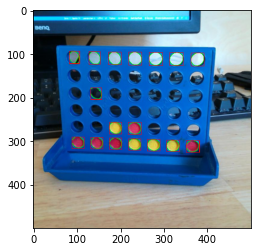

In [100]:
contour_list = []
rect_list = []
position_list = []
img_w, img_h = img.shape[0], img.shape[1]
# print(img_w, img_h)

for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True) # Contour Polygons
    area = cv2.contourArea(contour)
    
    rect = cv2.boundingRect(contour) # Polygon bounding rectangles
    x_rect,y_rect,w_rect,h_rect = rect
    x_rect +=  w_rect/2
    y_rect += h_rect/2
    area_rect = w_rect*h_rect
    
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 250) & (area_rect < (img_w*img_h)/5)) & (w_rect in range(h_rect-10,h_rect+10)): # Circle conditions
        contour_list.append(contour)
        position_list.append((x_rect,y_rect))
        rect_list.append(rect)

img_circle_contours = img.copy()
cv2.drawContours(img_circle_contours, contour_list,  -1, (0,255,0), thickness=1) # Display Circles
for rect in rect_list:
    x,y,w,h = rect
    cv2.rectangle(img_circle_contours,(x,y),(x+w,y+h),(0,0,255),1)
showImage(img_circle_contours)